In [2]:
# Leer archivo csv, encabezado verdadero, separador por defecto ","
# https://drive.google.com/file/d/0B-dmEvN59Z2ZUWlXVE40MEI5VEU/view?usp=sharing
datos_raw<-read.csv("BelisarioMV.csv", header = T)
head(datos_raw)

DATE,PRECIPITATION.mm.,WINDDIR.deg.,WINDDPEED.m.s.,PARTICULAS.microg.m3.
01/06/2007,9.3,125.09,1.91,24.84
04/06/2007,0.1,200.03,2.77,17.81
05/06/2007,0.0,178.09,3.24,15.86
06/06/2007,0.0,45.07,2.56,26.33
07/06/2007,0.0,44.83,2.09,23.46
08/06/2007,0.1,85.26,2.37,21.83


In [7]:
# Eliminar información de fecha
datos_mv <- datos_raw[,2:5]
head(datos_mv)

PRECIPITATION.mm.,WINDDIR.deg.,WINDDPEED.m.s.,PARTICULAS.microg.m3.
9.3,125.09,1.91,24.84
0.1,200.03,2.77,17.81
0.0,178.09,3.24,15.86
0.0,45.07,2.56,26.33
0.0,44.83,2.09,23.46
0.1,85.26,2.37,21.83


In [8]:
#Resumen de los datos, con información de valores faltantes NA's
summary(datos_mv)

 PRECIPITATION.mm.  WINDDIR.deg.    WINDDPEED.m.s.  PARTICULAS.microg.m3.
 Min.   : 0.000    Min.   :  0.02   Min.   :0.250   Min.   : 5.74        
 1st Qu.: 0.000    1st Qu.: 71.77   1st Qu.:1.540   1st Qu.:14.74        
 Median : 0.100    Median :116.28   Median :1.730   Median :18.19        
 Mean   : 3.111    Mean   :115.80   Mean   :1.889   Mean   :18.42        
 3rd Qu.: 3.100    3rd Qu.:154.66   3rd Qu.:2.070   3rd Qu.:21.87        
 Max.   :40.300    Max.   :359.40   Max.   :6.240   Max.   :57.11        
 NA's   :2         NA's   :27       NA's   :14      NA's   :40           

In [9]:
# is.na devuleve valores logicos TRUE si es NA, FALSE en caso contrario
datos_na<-is.na(datos_mv)
head(datos_na)

PRECIPITATION.mm.,WINDDIR.deg.,WINDDPEED.m.s.,PARTICULAS.microg.m3.
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


In [33]:
# Reemplace los missing values por la media de cada atributo
for(i in 1:ncol(datos_mv)){
    datos_mv[,i][datos_na[,i]] <- mean(datos_mv[,i], na.rm = T)
    }

In [34]:
summary(datos_mv)

 PRECIPITATION.mm.  WINDDIR.deg.    WINDDPEED.m.s.  PARTICULAS.microg.m3.
 Min.   : 0.000    Min.   :  0.02   Min.   :0.250   Min.   : 5.74        
 1st Qu.: 0.000    1st Qu.: 72.54   1st Qu.:1.540   1st Qu.:14.87        
 Median : 0.100    Median :115.80   Median :1.740   Median :18.36        
 Mean   : 3.111    Mean   :115.80   Mean   :1.889   Mean   :18.42        
 3rd Qu.: 3.111    3rd Qu.:153.54   3rd Qu.:2.065   3rd Qu.:21.73        
 Max.   :40.300    Max.   :359.40   Max.   :6.240   Max.   :57.11        

In [31]:
# Creamos datos_cleaned y agregamos 2 columnas
# PL2, 2 clases: PARTICULAS<15, PARTICULAS>15
# PL3, 3 clases: PARTICULAS<10, 10<PARTICULAS<25, PARTICULAS>25
datos_cleaned <- datos_mv
datos_cleaned$PL2 <- ifelse(datos_cleaned$PARTICULAS.microg.m3.<15, "H", "UH")
datos_cleaned$PL3 <- ifelse(datos_cleaned$PARTICULAS.microg.m3.<10, "L", 
                            ifelse(datos_cleaned$PARTICULAS.microg.m3.<25,"M","H"))

In [32]:
head(datos_cleaned)

PRECIPITATION.mm.,WINDDIR.deg.,WINDDPEED.m.s.,PARTICULAS.microg.m3.,PL2,PL3
9.3,125.09,1.91,24.84,UH,M
0.1,200.03,2.77,17.81,UH,M
0.0,178.09,3.24,15.86,UH,M
0.0,45.07,2.56,26.33,UH,H
0.0,44.83,2.09,23.46,UH,M
0.1,85.26,2.37,21.83,UH,M


In [35]:
# Transformamos WDir y WSpeed de coord polares a cartesianas
# X = cos(WDir*pi/180)*WSpeed
# Y = sin(WDir*pi/180)*WSpeed
datos_cleaned$X <- cos(datos_cleaned$WINDDIR.deg.*pi/180)*datos_cleaned$WINDDPEED.m.s.
datos_cleaned$Y <- sin(datos_cleaned$WINDDIR.deg.*pi/180)*datos_cleaned$WINDDPEED.m.s.
head(datos_cleaned)

PRECIPITATION.mm.,WINDDIR.deg.,WINDDPEED.m.s.,PARTICULAS.microg.m3.,PL2,PL3,X,Y
9.3,125.09,1.91,24.84,UH,M,-1.0979873,1.5628576
0.1,200.03,2.77,17.81,UH,M,-2.6024521,-0.9487586
0.0,178.09,3.24,15.86,UH,M,-3.2381999,0.1079880
0.0,45.07,2.56,26.33,UH,H,1.8079804,1.8124036
0.0,44.83,2.09,23.46,UH,M,1.4822315,1.4734618
0.1,85.26,2.37,21.83,UH,M,0.1958432,2.3618945


In [39]:
# Guardamos 4 archivos csv para los siguienets análisis:
# 1. Archivo con los datos limpios y transformados + datos originales
# 2. Clasificación binaria: PL2
# 3. Clasificación multiclases: PL3
# 4. Regresión: PARTICULAS
write.csv(datos_cleaned, file="cleanedData.csv", row.names=F)
write.csv(datos_cleaned[,c(1,7,8,4)], file="regressionData.csv", row.names=F)
write.csv(datos_cleaned[,c(1,7,8,5)], file="binClassData.csv", row.names=F)
write.csv(datos_cleaned[,c(1,7,8,6)], file="mulClassData.csv", row.names=F)

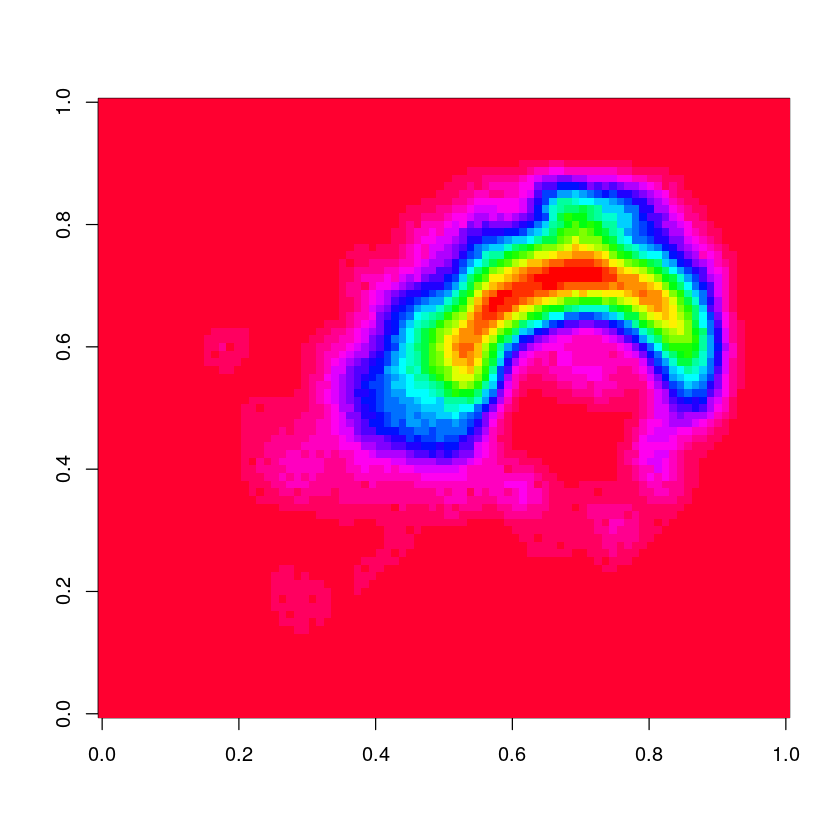

In [2]:
d <- read.csv("regressionData.csv") # Load data file
# head(d)

dX <- round(d$X + abs(min(d$X)), 1)*10+1 # Transform X to positive integer
dY <- round(d$Y + abs(min(d$Y)), 1)*10+1 # Transform Y to positive integer

m <- matrix(0, max(dX), max(dY))
for (i in 1:length(dX)) {
    m[dX[i], dY[i]] <- d$PARTICULAS.microg.m3.[i]
}

# Smoothing kernels
# k <- c(1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1)
# k <- c(1:21,seq(20,1,by=-1))  # kernel triangualr
# k <- c(1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1)
# k <- c(1, 4, 6, 4, 1)
k <- c(1, 20, 190, 1140, 4845, 15504, 38760, 77520, 125970, 167960,
184756, 167960, 125970, 77520, 38760, 15504, 4845, 1140, 190, 20, 1)

f <- dim(m)[1]
c <- dim(m)[2]

mf <- matrix(0, max(dX), max(dY)) # crea una matriz con elementos igual a 0
mitad <- ceiling(length(k)/2) # mitad del kernel 
# no evaluo los extremos de la matriz
# solo los elementos que permiten evaluar el kernel a partir de la posición 1,1
# kernel = k*t(k), matriz de lenght(k) x lenght(k)
intervalo <-  mitad - 1 # intervalo del kernel

# El bucle for evalua el kernel para la matriz m con los datos de pm2.5
# Lo que era una serie de puntos ahora ha sido suavizado por el kernel 2d
# mf = m * k * t(k)
for (i in  mitad:(f-intervalo)) {
    for (j in  mitad:(c-intervalo)) {
        pl <- m[i,j]
        mf[(i-intervalo):(i+intervalo),(j-intervalo):(j+intervalo)] <- 
            mf[(i-intervalo):(i+intervalo),(j-intervalo):(j+intervalo)] + k%*%t(k)/k[ mitad]^2*pl
        mf[i, j] <- mf[i, j] - pl # el punto central del kernel ha sido duplicado a partir del 
        # valor original en m, restamos para corregir
    }
}
image(mf, col=rev(rainbow(32))) 
#contour(mf, add=T)

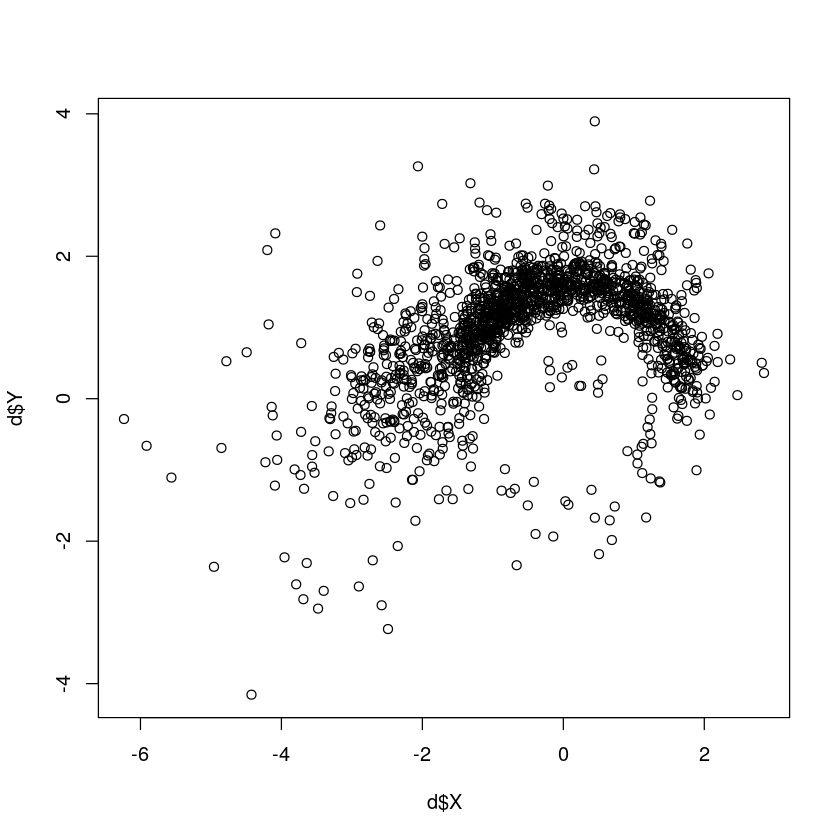

In [3]:
# Comparar con 
plot(d$X, d$Y)